# MODELOS

## PAQUETERIAS

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from keras import regularizers
from sklearn.feature_extraction.text import CountVectorizer
import re
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sns


stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lazar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## LECTURA DE DATOS

In [9]:
data = pd.read_csv("../data/processed_articles.csv")
data.head()

,article_id,dataset_id,type,surrounding_text,relative_location
0,10.1002_2017jc013030,https://doi.org/10.17882/49388,Primary,Biogeochemical Argo oat measurements for bioge...,0.628737
1,10.1002_ece3.5260,https://doi.org/10.5061/dryad.2f62927,Primary,design experiments and Adephaga_2.9Kv1 final p...,0.747107
2,10.1002_ecs2.1280,https://doi.org/10.5061/dryad.p3fg9,Primary,Data associated with this paper have been depo...,0.994695
3,10.1007_s00259-022-06053-8,https://doi.org/10.7937/tcia.2019.30ilqfcl,Secondary,from the ACRIN 6668 Trial NSCLC-FDG-PET. Cance...,0.841804
4,10.1016_j.jobe.2023.107105,https://doi.org/10.5281/zenodo.8014150,Primary,and Anh [30] further explored crack 1 Dataset ...,0.179820


## LIMPIEZA DE DATOS 

Definimos las funciones que nos ayudaran a obtener los tokens sin datos extra 

In [10]:
def remove_stopwords(text):
    for i in stopwords:
        text = re.sub(r"\b%s\b" % i, " ", text)
    return text

def clean_tokens(text): 
    '''
    Esta función limpia textos
    '''

    text = text.lower()

    text = remove_stopwords(text)

    text = re.sub(r"\d+", '', text)

    text = re.sub(r"", '', text)

    text = re.sub(r" +", " ", re.sub(r"\t", " ", re.sub(r"\n+", "\n", re.sub(r'(?:[.,\/!$%?¿?!¡\^&\*;:\[\]{}=><\-_`~()”“"\'\|])', "", text))))

    text = text.strip()

    return text  

def numerical_type(text):

    text = text.lower()

    text = re.sub(r"primary", '0', text)

    text = re.sub(r"secondary", '1', text)

    text = text.strip()

    return text  

In [11]:
data['clean_surrounding_text'] = data['surrounding_text'].apply(lambda x: clean_tokens(x))
data['numerical_type'] = data['type'].apply(lambda x: numerical_type(x))

data.head()

,article_id,dataset_id,type,surrounding_text,relative_location,clean_surrounding_text,numerical_type
0,10.1002_2017jc013030,https://doi.org/10.17882/49388,Primary,Biogeochemical Argo oat measurements for bioge...,0.628737,biogeochemical argo oat measurements biogeoche...,0
1,10.1002_ece3.5260,https://doi.org/10.5061/dryad.2f62927,Primary,design experiments and Adephaga_2.9Kv1 final p...,0.747107,design experiments adephagakv final probe set ...,0
2,10.1002_ecs2.1280,https://doi.org/10.5061/dryad.p3fg9,Primary,Data associated with this paper have been depo...,0.994695,data associated paper deposited dryad target d...,0
3,10.1007_s00259-022-06053-8,https://doi.org/10.7937/tcia.2019.30ilqfcl,Secondary,from the ACRIN 6668 Trial NSCLC-FDG-PET. Cance...,0.841804,acrin trial nsclcfdgpet cancer imaging arch ta...,1
4,10.1016_j.jobe.2023.107105,https://doi.org/10.5281/zenodo.8014150,Primary,and Anh [30] further explored crack 1 Dataset ...,0.179820,anh explored crack dataset download link targe...,0


In [12]:
X = data['clean_surrounding_text'].fillna(' ')
Y = data['numerical_type']
print('Corpus Total', len(X), len(Y))

Corpus Total 412 412


In [13]:
X

0      biogeochemical argo oat measurements biogeoche...
1      design experiments adephagakv final probe set ...
2      data associated paper deposited dryad target d...
3      acrin trial nsclcfdgpet cancer imaging arch ta...
4      anh explored crack dataset download link targe...
                             ...                        
407    june myodes glareolus url june turdus merula t...
408    global biodiversity information facility gbif ...
409    brook bartlett sites ver environmental data in...
410    usa present ver environmental data initiative ...
411    jeffers brook stands ver environmental data in...
Name: clean_surrounding_text, Length: 412, dtype: object

In [14]:
Y

0      0
1      0
2      0
3      1
4      0
      ..
407    1
408    1
409    1
410    1
411    0
Name: numerical_type, Length: 412, dtype: object

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42, stratify=data['numerical_type'])

In [16]:
print('Corpus Entrenamiento', len(X_train), len(y_train))

Corpus Entrenamiento 370 370


In [17]:
X_train

174                g g r q e esev targetaduckjiangsuhn e
279    arrayexpress url following accession numbers e...
47     ipr sialidase go digestive enzyme orthos targe...
203    c tumor cell lines cell lines tc rridcvcl tc r...
266    ipav lif prjna linhai lil prjna hardjo norma g...
                             ...                        
20     analysis available dryad digital repository ta...
105    url gbif b gbif occurrence download accessed d...
29     domain unknown function duf function orthos ta...
407    june myodes glareolus url june turdus merula t...
63     lower right part micrograph causing blurring e...
Name: clean_surrounding_text, Length: 370, dtype: object

In [18]:
y_train

174    0
279    1
47     1
203    1
266    1
      ..
20     0
105    1
29     1
407    1
63     1
Name: numerical_type, Length: 370, dtype: object

In [19]:
X_train = tf.constant(X_train, dtype=tf.string)
X_test = tf.constant(X_test, dtype=tf.string)
y_train = tf.constant(y_train, dtype=tf.int32)
y_test = tf.constant(y_test, dtype=tf.int32)

In [20]:
# Dataframe con los textos (variable indepnediente) como strings y el rating como una variable numérica int64
print(data.info())

# Analizando la salida de Rating vemos que no tenemos una distribución completa de 0 a 5, aun así generare la red con 6 neuronas de salida
data.value_counts('numerical_type')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   article_id              412 non-null    object 
 1   dataset_id              412 non-null    object 
 2   type                    412 non-null    object 
 3   surrounding_text        412 non-null    object 
 4   relative_location       412 non-null    float64
 5   clean_surrounding_text  412 non-null    object 
 6   numerical_type          412 non-null    object 
dtypes: float64(1), object(6)
memory usage: 22.7+ KB
None


numerical_type
1    274
0    138
Name: count, dtype: int64

In [21]:
t_vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=3000, 
                                  standardize='lower_and_strip_punctuation',
                                  split='whitespace',
                                  ngrams=2,
                                  output_mode='int'
                                  )

t_vectorize_layer.adapt(X_train)

In [22]:
# Generación del modelo 
t_inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string) # Si no declaro el tipo de dato en la capa de entrada, el modelo genera error al llamar la función fit
t_vectors = t_vectorize_layer(t_inputs)
t_embedding = tf.keras.layers.Embedding(input_dim=t_vectorize_layer.vocabulary_size(), output_dim=300)(t_vectors)
t_recurrent = tf.keras.layers.GRU(600, kernel_regularizer=regularizers.l2(3e-4))(t_embedding)
t_outputs = tf.keras.layers.Dense(6,activation='softmax')(t_recurrent)

In [34]:
title_model = tf.keras.Model(inputs=t_inputs, outputs=t_outputs)

In [24]:
# Scheduler para el learning rate 
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=4000,
    decay_rate=0.9)

# Inicialización del optimizador para controlar el learning rate 
t_optimizer = tf.keras.optimizers.Nadam(learning_rate=lr_schedule)

# Compilación del modelo 
title_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=t_optimizer,
    metrics=['accuracy']
    )

title_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization              │ (None, None)           │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, None, 300)      │       900,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 600)            │     1,623,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │         3,606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,527,206 (9.64 MB)

 Trainable params: 2,527,206 (9.64 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Guarda el mejor modelo de acuerdo al validation accuracy a lo largo de todo el entrenamiento 
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('checkpoint_best.keras', save_best_only=True)

# Generar historia para Tensorboard 
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir='tensorboard_logs', name='model'):
    return Path(root_logdir) / strftime(name+'_run_%Y_%m_%d_%H_%M_%S')

# Crea el directorio de la corrida
run_logdir = get_run_logdir(name='title_model')
# Declara el callback para el logeo con Tensorboard
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

# Callback para parar de manera anticipada cuando el loss de la validación deja de mejorar. La paciencia esta en 10 epocas. 
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10)

In [27]:
t_history = title_model.fit(X_train, y_train, batch_size=15, epochs=100, validation_split=0.1, callbacks=[checkpoint_cb, tensorboard_cb, early_stopping_cb])

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.5975 - loss: 1.2826 - val_accuracy: 0.6486 - val_loss: 1.0473
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5803 - loss: 0.9130 - val_accuracy: 0.7027 - val_loss: 0.6684
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7387 - loss: 0.6337 - val_accuracy: 0.6486 - val_loss: 0.7547
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8365 - loss: 0.4402 - val_accuracy: 0.8108 - val_loss: 1.4848
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9781 - loss: 0.1777 - val_accuracy: 0.9189 - val_loss: 0.3766
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9785 - loss: 0.1337 - val_accuracy: 0.8649 - val_loss: 0.7045
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9942 - loss: 0.0878 - val_accuracy: 0.9189 - val_loss: 0.4014
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 1.0000 - loss: 0.0502 - val_accuracy: 0.

<Axes: xlabel='Epoch'>

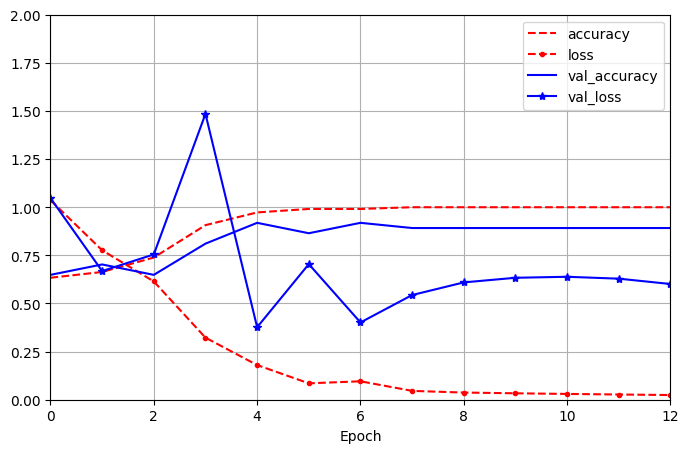

In [28]:
import pandas as pd

# Graficar el accuracy y loss del modelo, dado que al entrenar guardamos el modelo en un objeto history que registra el loss y acurracy de cada epoch
pd.DataFrame(t_history.history).plot(
    figsize=(8,5),
    xlim=[0,12],
    ylim=[0,2],
    grid=True,
    xlabel='Epoch',
    style=['r--','r--.','b-','b-*']
)

In [29]:
# Evaluación del modelo entrenado hasta la última época
title_model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9737 - loss: 0.2016 


[0.18857499957084656, 0.976190447807312]

In [30]:
# Evaluación final del mejor modelo (recuperado con el callback de ModelCheckpoint)
best_title_model = tf.keras.models.load_model('checkpoint_best.keras')
best_title_model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8264 - loss: 0.6205  


[0.6115585565567017, 0.8333333134651184]

In [31]:
y_pred_title = best_title_model.predict(X_test).argmax(axis=1)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_title))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
              precision    recall  f1-score   support

           0       0.89      0.57      0.70        14
           1       0.82      0.96      0.89        28

    accuracy                           0.83        42
   macro avg       0.85      0.77      0.79        42
weighted avg       0.84      0.83      0.82        42



In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_title)

array([[ 8,  6],
       [ 1, 27]], dtype=int64)

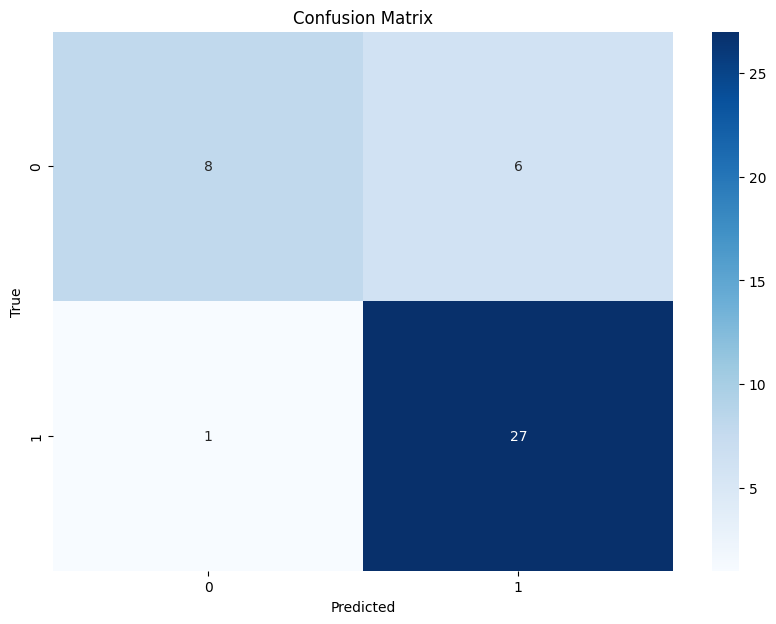

In [33]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_title), annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Qué nos dice la matriz de confusión**

*   Cuadrante Superior Izquierdo (8): Verdaderos Negativos (TN)

Qué significa: Hubo 8 casos que eran de la clase '0' y el modelo acertó en 8 de ellos.

*   Cuadrante Inferior Derecho (27): Verdaderos Positivos (TP)

Qué significa: Hubo 27 casos que eran de la clase '1' y el modelo acertó en 25.

*   Cuadrante Superior Derecho (6): Falsos Positivos (FP)

Qué significa: Hubo 6 casos que eran '0', pero el modelo se equivocó y los predijo como '1'.

*   Cuadrante Inferior Izquierdo (1): Falsos Negativos (FN)

Qué significa: Hubo 1 casos que eran '1', pero el modelo se equivocó y los predijo como '0'.